# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the book review data set and will be predicting if something is a positive review or not. 

This would be a supervised problem and binary classification since a review is either positive or not. The feature in this case is the review and the label is "Positive Review"

Some real world applications of this problem are
* getting a quick overview of what people think about a book
* quickly identifying strong reviews to improve marketing of a book

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    
<b>Notes</b>:
* yes check for missing values, outliers, etc.
* only one feature and the columns names are fine, all columns are relevant. 
* for NLP, would need to process the words by removing stop words and doing some lemmatization. 

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
<b>Notes</b>
I think <b>Neural network</b> and <b>Logistic Regression</b> would be good choices. 
For both I would need to vectorize the words since they take numerical input. 
No scaling needed. 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    
<b>Notes</b>
For both, accuracy is important. 
For neural networks, changing units, epochs, and dropout layers will help optimize it. 
For logistic regression I would check the area under the curve (AUC) and maybe optimize the C hyperparameter.
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
df.describe()

# total 1973 reviews but only 1865 unique ones!

,Review,Positive Review
count,1973,1973
unique,1865,2
top,How can a best-selling author like Simon Winch...,False
freq,3,993


In [4]:
df.info() #types look fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


In [5]:
df.isna().sum() #no missing values 🙂

Review             0
Positive Review    0
dtype: int64

In [6]:
#double checking the duplicates and uniqueness
print(len(df['Review'].unique()))
print(df.shape)

1865
(1973, 2)


In [7]:
print(df['Review'].duplicated().sum())
print(df[df['Review'].duplicated()])

108
                                                 Review  Positive Review
144   I am a Jew living in a college town in Mississ...            False
149   I have enjoyed many of Mark's novels (Do You K...            False
309   Dr. Hawkins first book, Power vs Force was int...            False
399   I picked this up because it's considered a cla...            False
405   I am so sorry that I bought this book.  It is ...            False
...                                                 ...              ...
1922  Don't get me wrong, I really enjoy Neal Stephe...            False
1935  I thought this book would be great and was rea...            False
1946  ...if you're in the bathroom with time on your...            False
1962  Ripping off King, but with more sex, shallower...            False
1963  This book expounds endlessly on how best to li...            False

[108 rows x 2 columns]


In [8]:
#drop the duplicates
df = df.drop_duplicates()
df.shape

(1865, 2)

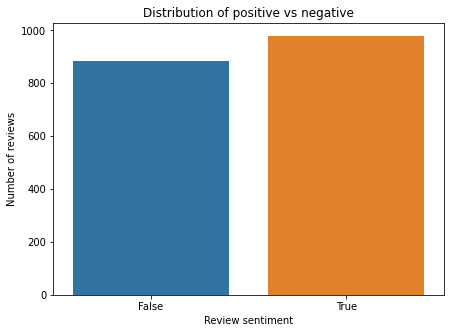

In [9]:
#checking for class imbalance
plt.figure(figsize=(7,5))
sns.countplot(x="Positive Review", data = df)
plt.title("Distribution of positive vs negative")
plt.xlabel("Review sentiment")
plt.ylabel("Number of reviews")
plt.show()

⬆️⬆️ fairly balanced distribution between positive and negative reviews. 

### preprocessing the review text

using [transforming text into word embeddings](https://lms.ecornell.com/courses/1852082/pages/code-transforming-text-using-word-embeddings?module_item_id=33560658)

In [10]:
import gensim

In [11]:
original_reviews = df['Review']
df['Review'] = df['Review'].apply(lambda row: gensim.utils.simple_preprocess(row))

In [12]:
df['Review']

0       [this, was, perhaps, the, best, of, johannes, ...
1       [this, very, fascinating, book, is, story, wri...
2       [the, four, tales, in, this, collection, are, ...
3       [the, book, contained, more, profanity, than, ...
4       [we, have, now, entered, second, time, of, dee...
                              ...                        
1968    [purchased, the, book, with, the, intention, o...
1969    [there, are, so, many, design, books, but, the...
1970    [am, thilled, to, see, this, book, being, avai...
1971    [as, many, have, stated, before, me, the, book...
1972    [love, this, book, it, is, terrific, blend, of...
Name: Review, Length: 1865, dtype: object

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<b>Answer</b>
I only had one feature 'Review', however now it's cleaned and also preprocessed with gensim.

To prepare the data for modeling I will use the tf-idf vectorizer to convert the text into numerical input. 

My models for this are:
* Neural network - I will construct the model, create the optimizer and loss function, and compile the model. To improve it I will test different epochs and combinations of dropout layers, as well different units. 
* logistic regression - I will train the model on the training vector and then find the accuracy and area under the curve (AUC). 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [13]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### TF-IDF vectorizer & creating test vs train data

In [14]:
#join the list of words into strings for tf-idf, 
#i guess it doesn't take lists

df['Review'] = df['Review'].apply(lambda tokens:' '.join(tokens))

In [15]:
# YOUR CODE HERE
y = df['Positive Review']
X = df.drop(columns='Positive Review')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1234)

In [17]:
# from assignment 8
tfidf_vectorizer=TfidfVectorizer()

tfidf_vectorizer.fit(X_train['Review'])

X_train_tfidf = tfidf_vectorizer.transform(X_train['Review'])

X_test_tfidf = tfidf_vectorizer.transform(X_test['Review'])

In [18]:
X

,Review
0,this was perhaps the best of johannes steinhof...
1,this very fascinating book is story written in...
2,the four tales in this collection are beautifu...
3,the book contained more profanity than expecte...
4,we have now entered second time of deep concer...
...,...
1968,purchased the book with the intention of teach...
1969,there are so many design books but the graphis...
1970,am thilled to see this book being available in...
1971,as many have stated before me the book starts ...


### Logistic Regression model

In [19]:
logistic_model = LogisticRegression(max_iter=100, C=100)
logistic_model.fit(X_train_tfidf, y_train)

probability_predictions = logistic_model.predict_proba(X_test_tfidf)[:,1]
class_label_predictions = logistic_model.predict(X_test_tfidf)

auc = roc_auc_score(y_test, probability_predictions)
logmodel_accuracy = accuracy_score(y_test, class_label_predictions)
print('AUC', auc)
print('accuracy', logmodel_accuracy)
                                        

AUC 0.8899728101116989
accuracy 0.8115631691648822


In [20]:
#checking a prediction against an actual one to see
print(original_reviews[21])
print('Prediction: positive?', class_label_predictions[21])
print('Actual: positive?', y_test.to_numpy()[21])

while this book is good attempt at placing statistical topics necessary to toxicology in one spot the mistakes are inexcusable many formula are incorrect as well as text referring to the wrong tables or data therefore one begins to lose trust in the information presented be careful if you use this book
Prediction: positive? True
Actual: positive? False


In [21]:
print(original_reviews[12])
print('Prediction: positive?', class_label_predictions[12])
print('Actual: positive?', y_test.to_numpy()[12])

temperance brennan is an american forensic anthropologist the author is anthropologist in real life and feel she gave to much detail as to body parts conditions locations in the book and in about the rd chapter to much time and space is wasted talking about gabby including in detail where gabby lives and details that surround the outside of gabbys place how gabby and tempe were friends from grad to man parts in life book was not for me dropped it at the rd chapter
Prediction: positive? False
Actual: positive? False


#### optimizing logistic regression
using [unit 4 assignment](https://lms.ecornell.com/courses/1852082/assignments/13484699?module_item_id=33560384)

for the logistic regression, using a C value of 100 increased the AUC and accuracy

<b>max_iter = 100, C=100</b>

AUC 0.8899728101116989
accuracy 0.8115631691648822

### neural network

In [22]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

18082


In [23]:
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape = (vocabulary_size,))
nn_model.add(input_layer)

#adding three hidden layers
hidden1 = keras.layers.Dense(units = 64, activation = 'relu')
nn_model.add(hidden1)
nn_model.add(keras.layers.Dropout(0.5))

hidden2 = keras.layers.Dense(units = 32, activation = 'relu')
nn_model.add(hidden2)
nn_model.add(keras.layers.Dropout(0.5))

hidden3 = keras.layers.Dense(units = 16, activation = 'relu')
nn_model.add(hidden3)

output_layer = keras.layers.Dense(units = 1, activation ='sigmoid')
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1157312   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,159,937
Trainable params: 1,159,937
Non-trainable params: 0
______________________________________________

In [24]:
#optimizer
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

In [25]:
#loss function
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

In [26]:
nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics = ['accuracy'])

In [27]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [28]:
t0 = time.time() # start time

num_epochs = 25 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs = num_epochs, verbose = 0, validation_split = 0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 25], Loss: 0.6915, Accuracy: 0.5313, Val_loss: 0.6928, Val_accuracy: 0.5071
Epoch [10/ 25], Loss: 0.6888, Accuracy: 0.5340, Val_loss: 0.6924, Val_accuracy: 0.5071
Epoch [15/ 25], Loss: 0.6822, Accuracy: 0.5555, Val_loss: 0.6871, Val_accuracy: 0.5071
Epoch [20/ 25], Loss: 0.6514, Accuracy: 0.6404, Val_loss: 0.6635, Val_accuracy: 0.6429
Epoch [25/ 25], Loss: 0.5329, Accuracy: 0.7415, Val_loss: 0.5531, Val_accuracy: 0.7571
Elapsed time: 6.62s


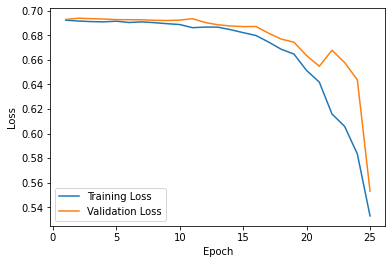

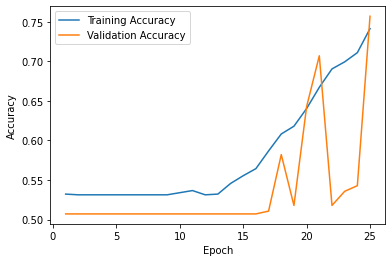

In [29]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### optimizing the neural network model

<b>55 epochs, no dropout layers</b>

Epoch [55/ 55], Loss: 0.0013, Accuracy: 1.0000, Val_loss: 0.6996, Val_accuracy: 0.7429
Elapsed time: 14.34s

<b>30 epochs, no dropout layers</b>

Epoch [30/ 30], Loss: 0.0909, Accuracy: 0.9848, Val_loss: 0.5370, Val_accuracy: 0.7643

<b>30 epochs, adding dropout layer (0.5) after hidden layer 2</b>
Epoch [30/ 30], Loss: 0.2097, Accuracy: 0.9374, Val_loss: 0.5822, Val_accuracy: 0.7607

<b>30 epochs, two dropout layers (0.5), after hidden layer 1 and 2</b>

Epoch [30/ 30], Loss: 0.3706, Accuracy: 0.8515, Val_loss: 0.5142, Val_accuracy: 0.7536

<b>same as last but with 25 epochs</b>

Epoch [25/ 25], Loss: 0.4598, Accuracy: 0.7737, Val_loss: 0.5238, Val_accuracy: 0.7214

Epoch [25/ 25], Loss: 0.2954, Accuracy: 0.8882, Val_loss: 0.4947, Val_accuracy: 0.7464

Epoch [25/ 25], Loss: 0.4770, Accuracy: 0.7674, Val_loss: 0.5073, Val_accuracy: 0.7429

** accuracy went down overall but more similar to validation accuracy now

#### evaluate neural network

In [30]:
loss, nn_accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(nn_accuracy))

15/15 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7944
Loss:  0.5301570296287537 Accuracy:  0.794432520866394


In [31]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 20 examples:")
for i in range(0,20):
    if probability_predictions[i] > 0.5:
        print("prediction probability:", probability_predictions[i], ", label:", y_test.to_numpy()[i])
        

Predictions for the first 20 examples:
prediction probability: [0.6512918] , label: True
prediction probability: [0.7730273] , label: True
prediction probability: [0.72353494] , label: True
prediction probability: [0.5102854] , label: True
prediction probability: [0.7703895] , label: True
prediction probability: [0.6828146] , label: True
prediction probability: [0.53447455] , label: True
prediction probability: [0.6568999] , label: True
prediction probability: [0.519375] , label: False
prediction probability: [0.70153236] , label: True
prediction probability: [0.52631867] , label: False


### comparing the two models

In [32]:
#log accuracy
print("Logistic regression model accuracy: ", logmodel_accuracy)

#neural network accuracy
print("Neural network model accuracy: ", nn_accuracy)

Logistic regression model accuracy:  0.8115631691648822
Neural network model accuracy:  0.794432520866394
